# Grover's Algorithm for Unstructured Search

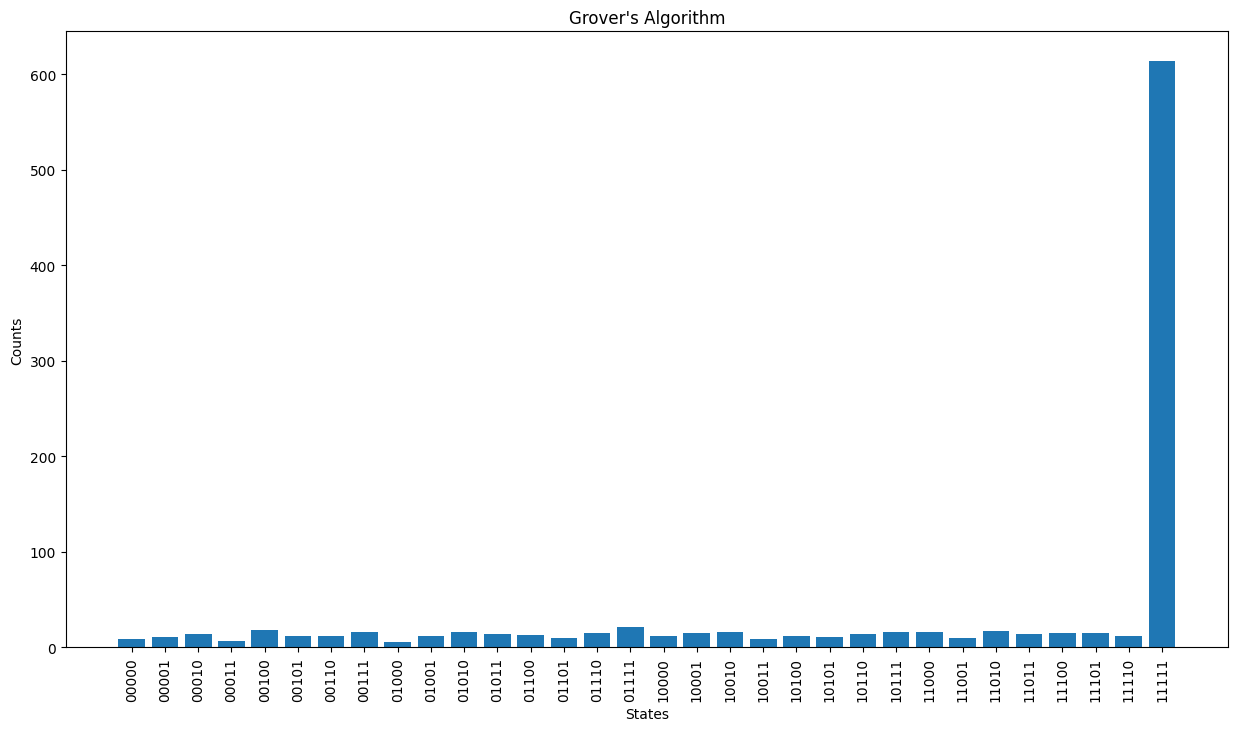

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from qiskit import (
    QuantumCircuit,
    QuantumRegister,
    ClassicalRegister,
    Aer,
    execute,
)


def oracle(circuit):
    # Apply a Z gate to flip the phase of the |11111> state
    circuit.h(4)
    # Multi-controlled X gate targeting the last qubit
    circuit.mcx(list(range(4)), 4)
    circuit.h(4)
    return circuit


def diffuser(circuit):
    # General diffuser for n=5 qubits
    circuit.h(range(5))
    circuit.x(range(5))
    circuit.h(4)
    circuit.mcx(list(range(4)), 4)  # Multi-controlled X gate
    circuit.h(4)
    circuit.x(range(5))
    circuit.h(range(5))
    return circuit


# Set up the quantum circuit
qreg = QuantumRegister(5)
creg = ClassicalRegister(5)
circuit = QuantumCircuit(qreg, creg)

# Apply Hadamard to all qubits to create a superposition
circuit.h(range(5))

# Apply Grover's iterations
iterations = 2  # TODO: Optimal number of iterations is (pi/4)*sqrt(2^n)
for _ in range(iterations):
    oracle(circuit)
    diffuser(circuit)

# Measurement
circuit.measure(qreg, creg)

# Execution and result
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, simulator, shots=1024).result()
counts = result.get_counts(circuit)

# Show histogram of results
keys = sorted(counts.keys())
values = [counts[key] for key in keys]

plt.figure(figsize=(15, 8))
plt.bar(keys, values)

plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Counts")
plt.title("Grover's Algorithm")

plt.show()